In [ ]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.1 MB/s eta 0:00:00


##**Correlation of Dataset** (For later reference)

Check Happiness Rank Row Carefully !! 

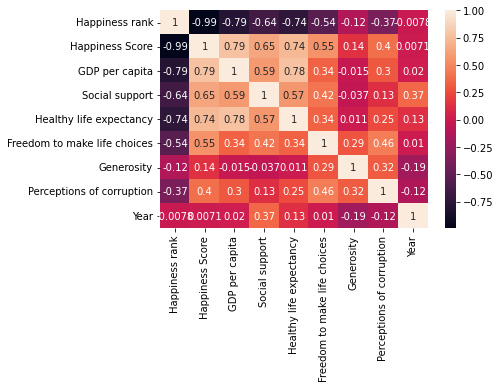

In [ ]:
import seaborn as sns
data_for_corr = pd.read_csv( 'https://raw.githubusercontent.com/aiskunks/The_Economics_of_Happiness/main/TEH/TEH_World_Happiness_2015_2019.csv' )
sns.heatmap(data_for_corr.corr(),annot=True)

## H2O starts 
Init is used to initialize H2O library.

strict_version_check : If True, an error will be raised if the client and server versions don’t match.

In [ ]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpaxh5uzjk
  JVM stdout: /tmp/tmpaxh5uzjk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpaxh5uzjk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_1l9ego
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [ ]:
## Please check we are importing dataset with H2O and not Pandas 
data = h2o.import_file( 'https://raw.githubusercontent.com/aiskunks/The_Economics_of_Happiness/main/TEH/TEH_World_Happiness_2015_2019.csv' )


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.describe()

Rows:782
Cols:10

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
type,enum,int,real,real,real,real,real,real,real,int
mins,,1.0,2.693000078,0.0,0.0,0.0,0.0,0.0,0.0,2015.0
mean,,78.69820971867004,5.379017902998721,0.9160474824757038,1.0783924825089533,0.6124155771253205,0.4110908258235294,0.21857584156138085,0.12527520997058825,2016.9936061381088
maxs,,158.0,7.769,2.096,1.644,1.141,0.724,0.838075161,0.55191,2019.0
sigma,,45.18238438270533,1.1274564601618513,0.4073401312916095,0.32954831933364276,0.2483086403761213,0.15288042062428447,0.12232074872244174,0.10584377164077122,1.4173644324240484
zeros,,0,0,5,5,5,5,5,7,0
missing,0,0,0,0,0,0,0,0,0,0
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.4363,0.14145,2015.0
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0


In [ ]:

# Data exploration and munging. Generate scatter plots 

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


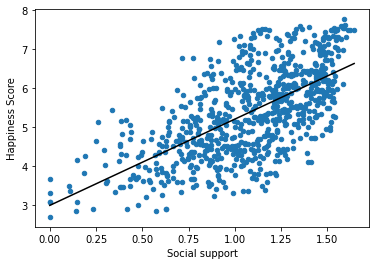

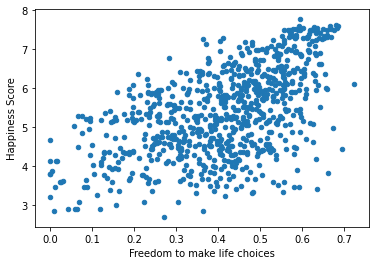

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


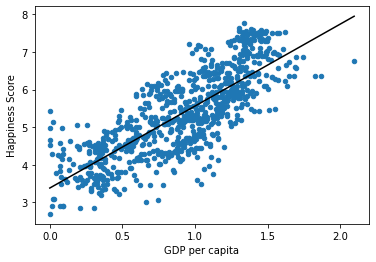

In [ ]:
scatter_plot(data, "Social support", "Happiness Score", fit = True)
scatter_plot(data, "Freedom to make life choices", "Happiness Score", max_points = 5000, fit = False)

scatter_plot(data, "GDP per capita", "Happiness Score", max_points = 5000, fit = True)

In [ ]:
# Use the .group_by function to countries Happiness Score
grouped = data.group_by("Country")
bpd = grouped.count().sum("Happiness Score").frame
bpd.show()
bpd.describe()
bpd.dim

Country,nrow,sum_Happiness Score
Afghanistan,5,17.564
Albania,5,23.563
Algeria,5,28.338
Angola,4,15.489
Argentina,5,32.297
Armenia,5,21.966
Australia,5,36.381
Austria,5,35.71
Azerbaijan,5,26.146
Bahrain,5,30.569


Rows:170
Cols:3

,Country,nrow,sum_Happiness Score
type,enum,int,real
mins,,1.0,4.369
mean,,4.6,24.74348235379412
maxs,,5.0,37.729999836
sigma,,1.0343222347059453,7.746500942954384
zeros,,0,0
missing,0,0,0
0,Afghanistan,5.0,17.56399991
1,Albania,5.0,23.563000053000003
2,Algeria,5.0,28.338000217


[170, 3]

In [ ]:
# Create a test/train split
train,test = data.split_frame([.9])


In [ ]:
#  Set response variable and your choice of predictor variables
myY = "Happiness Score"
myX = ["Happiness rank","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]


In [ ]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676415268249_3


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.002247 )  7                             6                              1                       py_13_sid_86a6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.018477662668824037
RMSE: 0.13593256662339617
MAE: 0.1019421187294795
RMSLE: 0.025179718640003644
Mean Residual Deviance: 0.018477662668824037
R^2: 0.9856105452702094
Null degrees of freedom: 698
Residual degrees of freedom: 692
Null deviance: 897.5938593954561
Residual deviance: 12.915886205508002
AIC: -790.1676276893729

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.015226235255840355
RMSE: 0.1233946322002718
MAE: 0.09981511091315699
RMSLE: 0.01997728619950173
Mean Residual Deviance: 0.015226235255840355
R^2: 0.9863169088728153
Null degrees of freedom: 82
Residual degrees of freedom: 76
Null deviance: 95.51545098154917
Residual deviance: 1.2637775262347495
AIC: -95.78923631699328

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance     training_mae        training_r2         validation_rmse     validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  --------------------  ------------------  ------------------  ------------------  ---------------------  -------------------  ------------------
    2023-02-14 22:54:42  0.000 sec   0             897.5938578420179          1.2841113846094676
    2023-02-14 22:54:42  0.016 sec   1                                                            0.13593256662339617  0.018477662668824037  0.1019421187294795  0.9856105452702094  0.1233946322002718  0.015226235255840355   0.09981511091315699  0.9863169088728153

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
Happiness rank                1.07819                1                    0.918034
Perceptions of corruption     0.0331205              0.0307186            0.0282008
Social support                0.0249212              0.0231139            0.0212194
Generosity                    0.0161659              0.0149935            0.0137646
Healthy life expectancy       0.0128919              0.011957             0.010977
Freedom to make life choices  0.0091657              0.00850101           0.00780421
GDP per capita                0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,830.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-02-14 22:54:43,0.033 sec,0.0,1.1331864,0.9423649,1.2841114,1.0727481,0.9014232,1.1507886
,2023-02-14 22:54:43,0.214 sec,1.0,1.0559927,0.8541170,1.1151206,0.9937793,0.8134308,0.9875973
,2023-02-14 22:54:43,0.274 sec,2.0,0.9883310,0.7842379,0.9767983,0.9238564,0.7453797,0.8535107
,2023-02-14 22:54:43,0.304 sec,3.0,0.9260586,0.7180941,0.8575846,0.8633069,0.6754607,0.7452988
,2023-02-14 22:54:43,0.346 sec,4.0,0.8712343,0.6647557,0.7590492,0.8066058,0.6255894,0.6506130
,2023-02-14 22:54:43,0.363 sec,5.0,0.8202914,0.6121417,0.6728781,0.7580154,0.5712997,0.5745873
,2023-02-14 22:54:43,0.397 sec,6.0,0.7737820,0.5754205,0.5987386,0.7085139,0.5356848,0.5019919
,2023-02-14 22:54:43,0.420 sec,7.0,0.7309063,0.5347503,0.5342240,0.6683200,0.4918483,0.4466516


In [ ]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor                    |   Normalized Coefficient |
|------------------------------+--------------------------|
| Intercept                    |                5.35832   |
| Happiness rank               |                1.07819   |
| Perceptions of corruption    |                0.0331205 |
| Social support               |                0.0249212 |
| Generosity                   |                0.0161659 |
| Healthy life expectancy      |                0.0128919 |
| Freedom to make life choices |                0.0091657 |
| GDP per capita               |                0         |


[('Happiness rank', 3301.438232421875, 1.0, 1.0),
 ('GDP per capita', 0.0, 0.0, 0.0),
 ('Social support', 0.0, 0.0, 0.0),
 ('Healthy life expectancy', 0.0, 0.0, 0.0),
 ('Freedom to make life choices', 0.0, 0.0, 0.0),
 ('Generosity', 0.0, 0.0, 0.0),
 ('Perceptions of corruption', 0.0, 0.0, 0.0)]

In [ ]:
dir(data_glm)


['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',
 '_fillMultinomi

Why we are getting Variable importance for only 1 variable whereas other variables are also important?


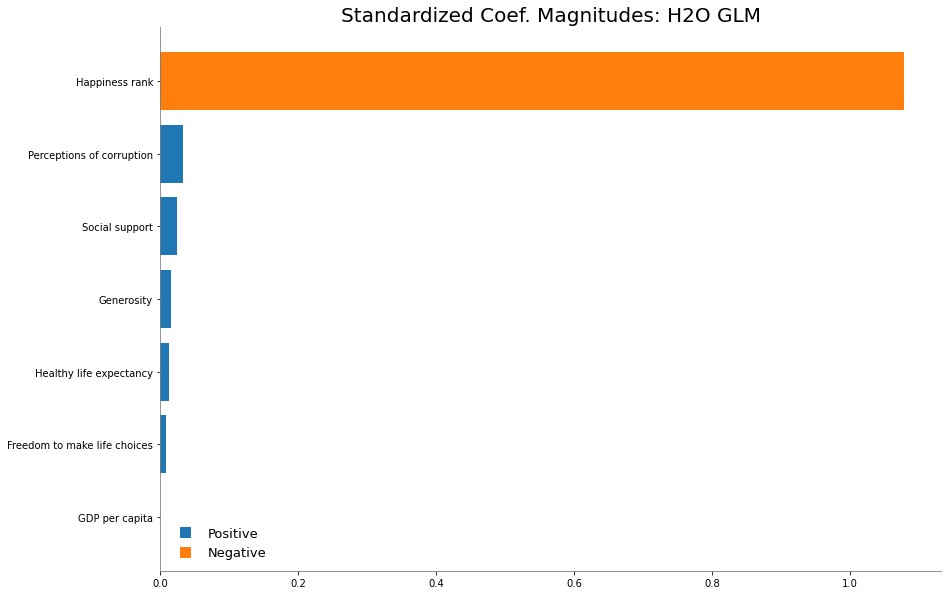

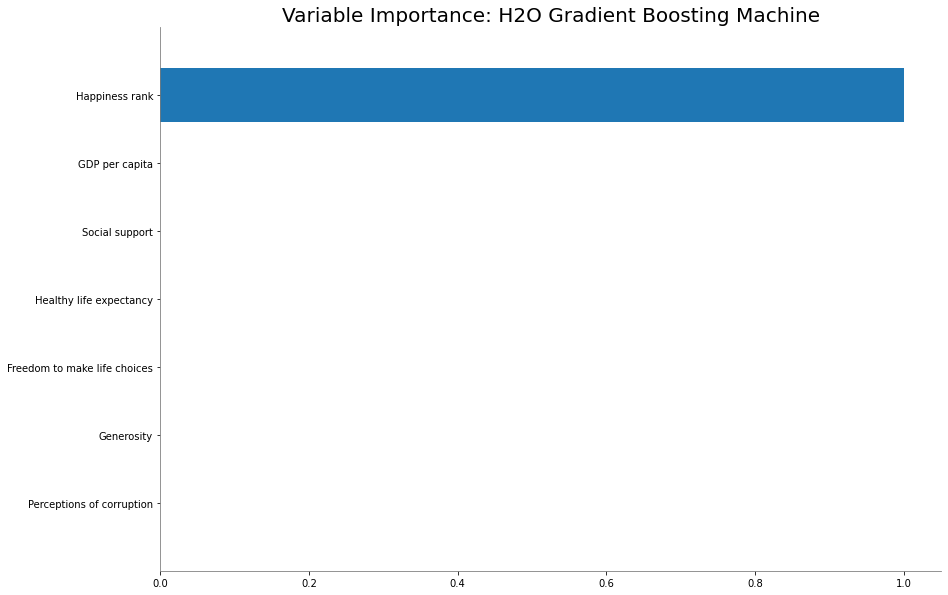

<Figure size 432x288 with 0 Axes>

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [ ]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.314765430648094
RMSE: 0.5610395981105915
MAE: 0.4020810364441844
RMSLE: 0.08779162590808548
Mean Residual Deviance: 0.314765430648094

## Pause.. it is important to check that output and understand it. Key is know your data best to validate the results
What you think was not normal in above plots ?? 
Happniess Rank as standard deviation as 1 ?? How is that possible ? 

Happiness Rank cannot be used because its like having measure for other country to measure other country. Lets now remove the happiness rank and see difference !! 

**We dropped Happiness Rank **

In [ ]:
data=data[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption","Happiness Score"]]

In [ ]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here 
train,test = data.split_frame([.9])

In [ ]:
#  Set response variable and your choice of predictor variables
#myY target 
#myX features 
myY = "Happiness Score"
myX = ["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

##GLM 
Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.

Syntax Specifics<br>
**family: Specify the model type.**

If the family is gaussian, the response must be numeric (Real or Int).

If the family is binomial, the response must be categorical 2 levels/classes or binary (Enum or Int).

If the family is fractionalbinomial, the response must be a numeric between 0 and 1.

If the family is multinomial, the response can be categorical with more than two levels/classes (Enum).

If the family is ordinal, the response must be categorical with at least 3 levels.

If the family is quasibinomial, the response must be numeric.

If the family is poisson, the response must be numeric and non-negative (Int).

If the family is negativebinomial, the response must be numeric and non-negative (Int).

If the family is gamma, the response must be numeric and continuous and positive (Real or Int).

If the family is tweedie, the response must be numeric and continuous (Real) and non-negative.

If the family is AUTO (default)

We can see we have metrics for Train and validation data.


Standardization is highly recommended; if you do not use standardization, the results can include components that are dominated by variables that appear to have larger variances relative to other attributes as a matter of scale, rather than true contribution. This option is enabled by default.


**Observations : <br>
1.Metrics 
MSE for test is somewhat greator than train which is fine.
2.Scoring History 
The scoring_history property in H2O AutoML provides a record of the model's performance on the training and validation data during the training process.

For the provided code, the scoring_history property will contain a list of dictionaries where each dictionary corresponds to a scoring event during the model training process. Each dictionary in the list will contain various performance metrics such as the root mean squared error (RMSE), mean absolute error (MAE), and R-squared for both the training and validation sets.

This information can be used to monitor the model's performance over time and to identify any potential issues such as overfitting. The scoring history can also be visualized to gain insights into the behavior of the model during the training process.

**What is scaled_importance and realtive_importance ?**
In H2O AutoML, the relative_importance and scaled_importance are properties of the trained models that provide information about the importance of each input feature (also known as predictor or independent variable) in predicting the target variable (also known as response or dependent variable).

The relative_importance is a measure of the feature importance relative to the most important feature in the model. The most important feature is assigned a relative importance value of 1, and the importance of other features is expressed as a ratio of their importance to the most important feature. The relative_importance property is often used to rank the features by their importance in the model.

The scaled_importance is a normalized measure of feature importance that takes into account the scale of the feature values. Features with larger values and variances tend to have higher importance values, so the scaled_importance property is calculated by dividing the relative_importance by the standard deviation of the feature values. The scaled_importance property is often used when the scale of the feature values is significantly different across the features.

Both relative_importance and scaled_importance are useful in feature selection and feature engineering tasks, as they can provide insights into which features are most important for the model and which features can be potentially dropped without significantly affecting the model's performance.
**



In [ ]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676415268249_5


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.001774 )  6                             6                              1                       py_17_sid_86a6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.29079176987070726
RMSE: 0.5392511194895262
MAE: 0.4213087061088728
RMSLE: 0.08876272593253567
Mean Residual Deviance: 0.29079176987070726
R^2: 0.7689460496703427
Null degrees of freedom: 711
Residual degrees of freedom: 705
Null deviance: 896.08396589866
Residual deviance: 207.04374014794357
AIC: 1157.1432124744904

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.39486354406803087
RMSE: 0.628381686610957
MAE: 0.4765615013610971
RMSLE: 0.10704913732114159
Mean Residual Deviance: 0.39486354406803087
R^2: 0.7109693567883526
Null degrees of freedom: 69
Residual degrees of freedom: 63
Null deviance: 96.79459626697228
Residual deviance: 27.640448084762163
AIC: 149.60634242118326

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2         validation_rmse    validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------  -----------------  ---------------------  ------------------  ------------------
    2023-02-14 23:15:32  0.000 sec   0             896.0839625891174          1.2585448912768502
    2023-02-14 23:15:32  0.011 sec   1                                                            0.5392511194895262  0.29079176987070726  0.4213087061088728  0.7689460496703427  0.628381686610957  0.39486354406803087    0.4765615013610971  0.7109693567883526

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
GDP per capita                0.476402               1                    0.360933
Freedom to make life choices  0.2334                 0.489923             0.176829
Healthy life expectancy       0.224688               0.471634             0.170228
Social support                0.216199               0.453817             0.163797
Perceptions of corruption     0.0986992              0.207176             0.0747766
Generosity                    0.0705313              0.14805              0.0534361

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

explain() method in H2O AutoML is used to generate a human-readable explanation of the model's behavior, including the importance of input features, how they influence the predicted outcome, and how the model makes predictions.

**Note** This method is only available for linear,  tree-based models, and some other models that have feature importance measures.

Taking only first 100 rows of train set (you can take more this is just for idea)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

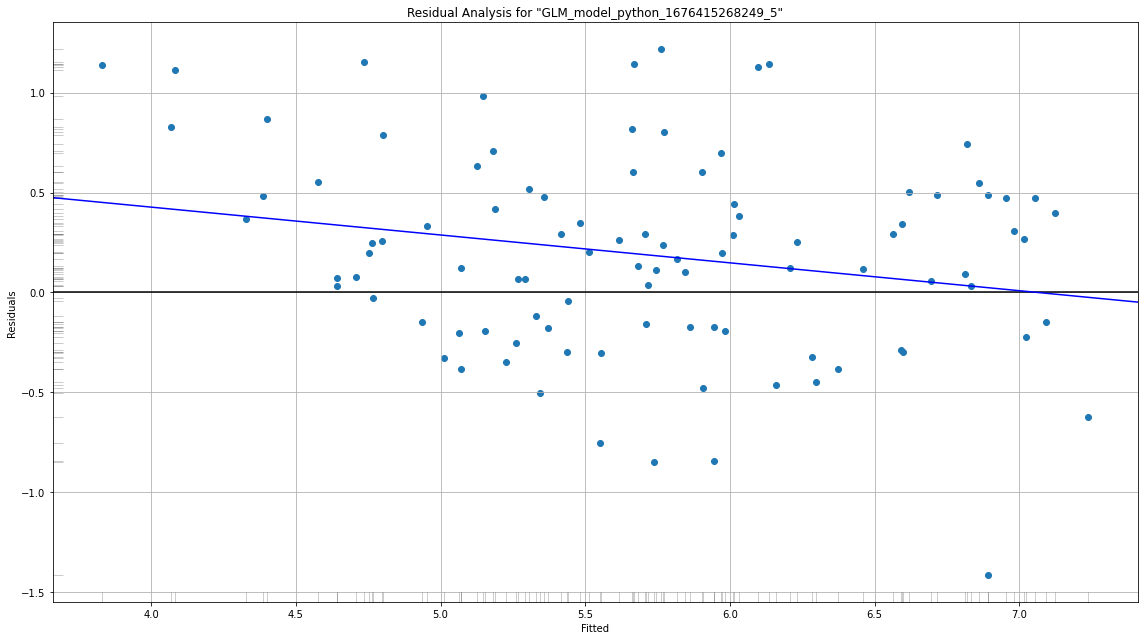

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

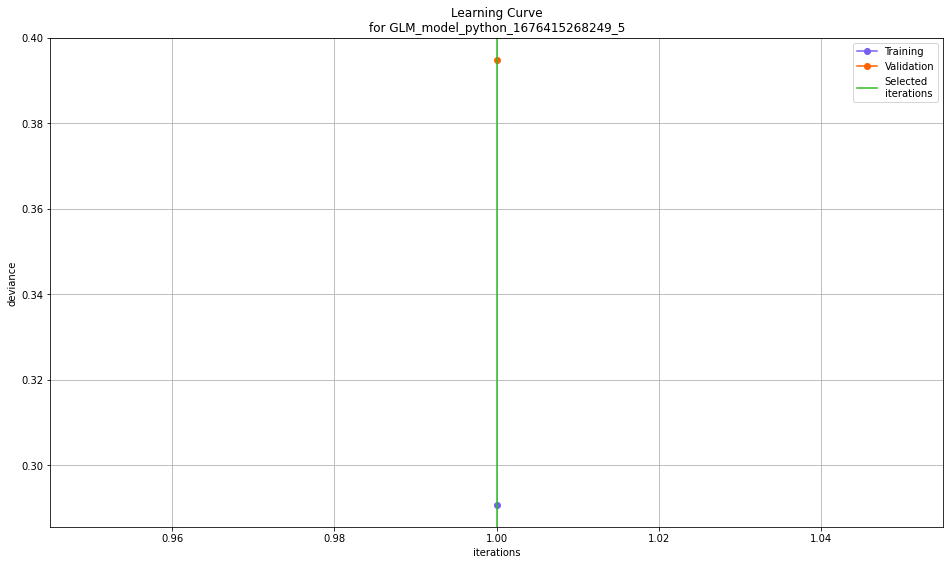

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

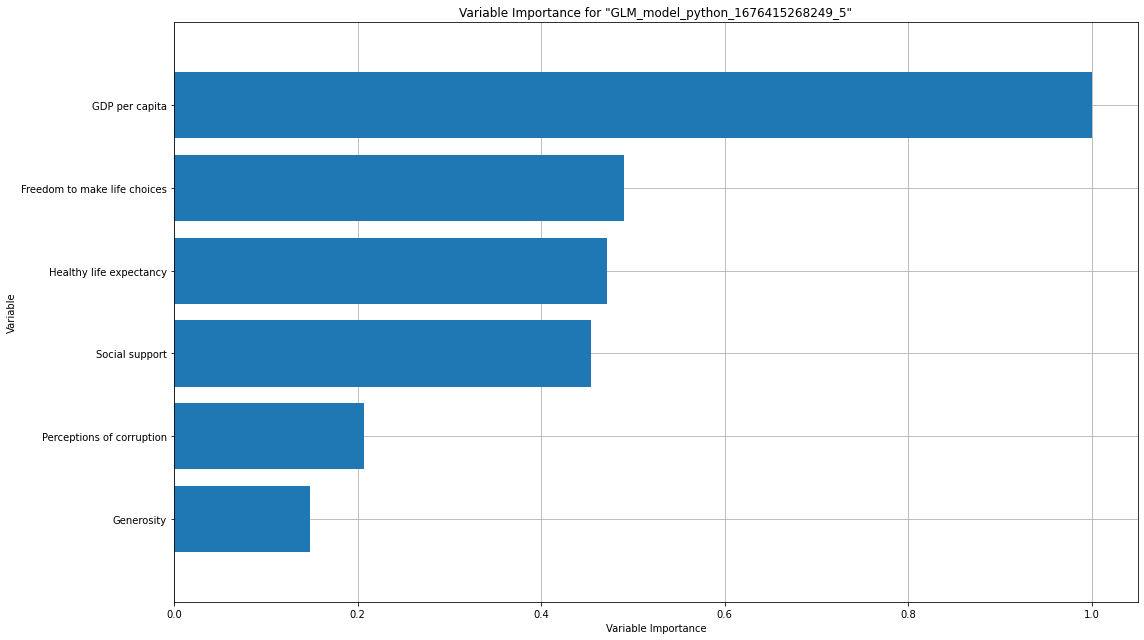

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

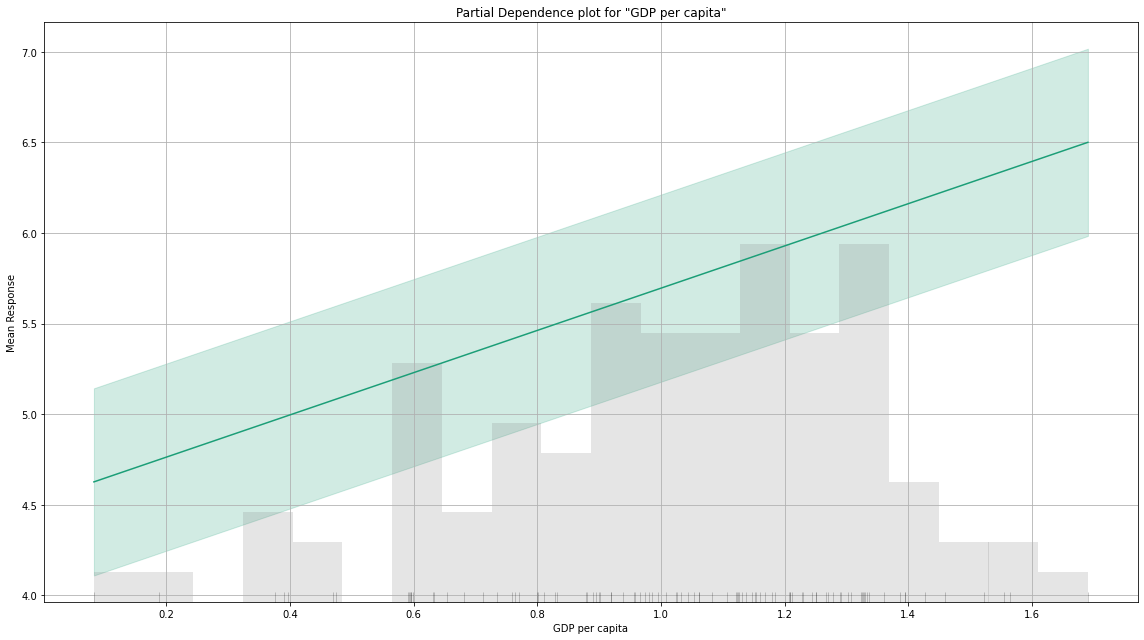

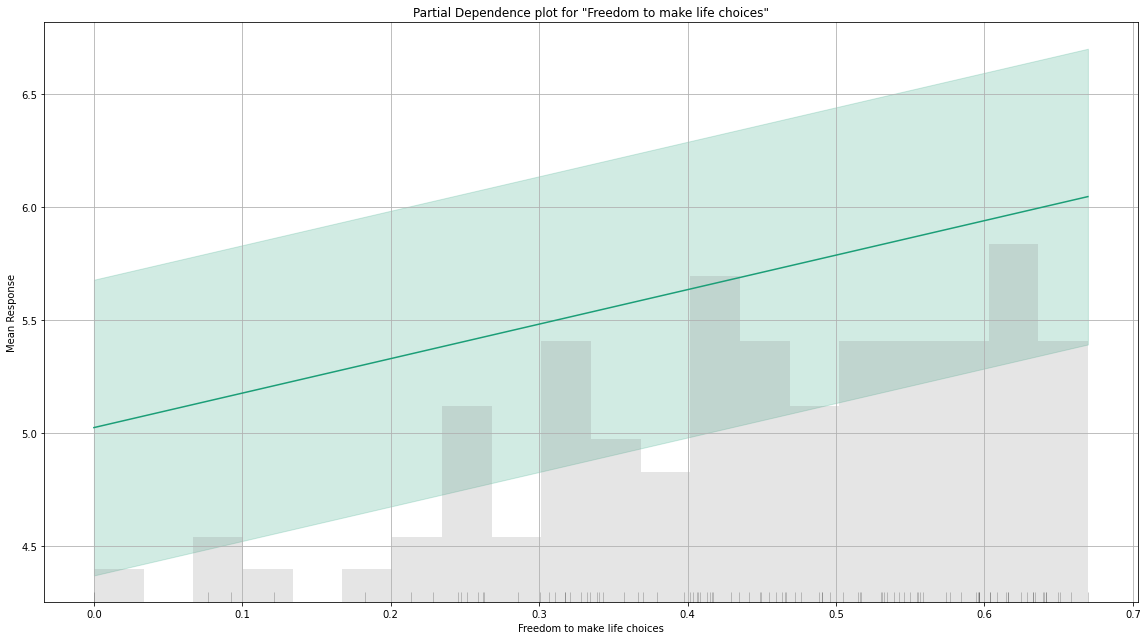

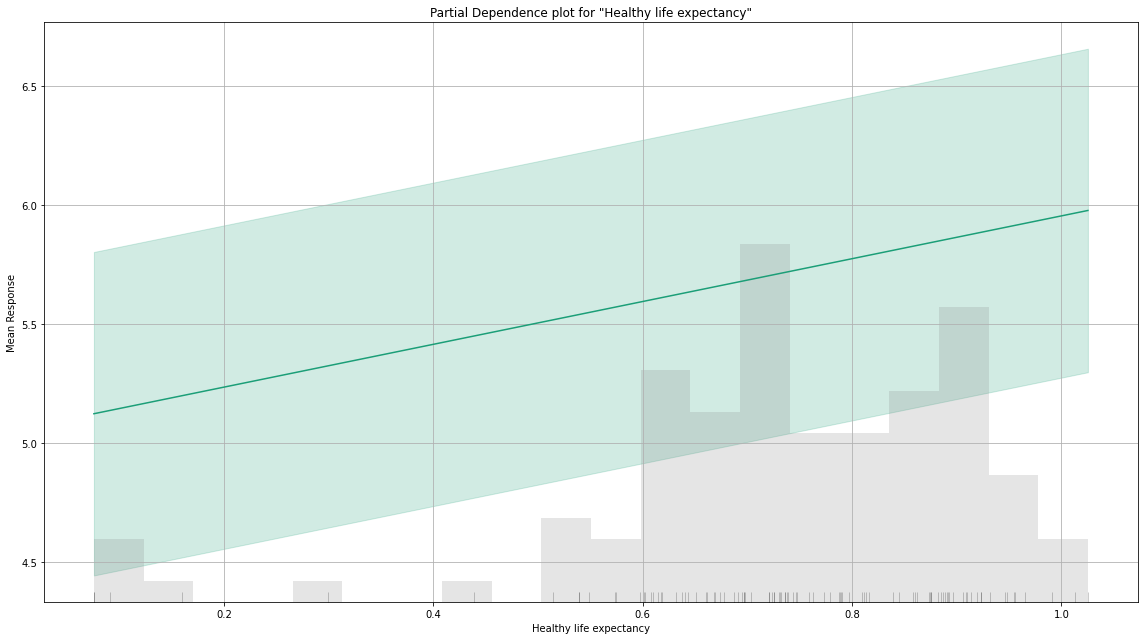

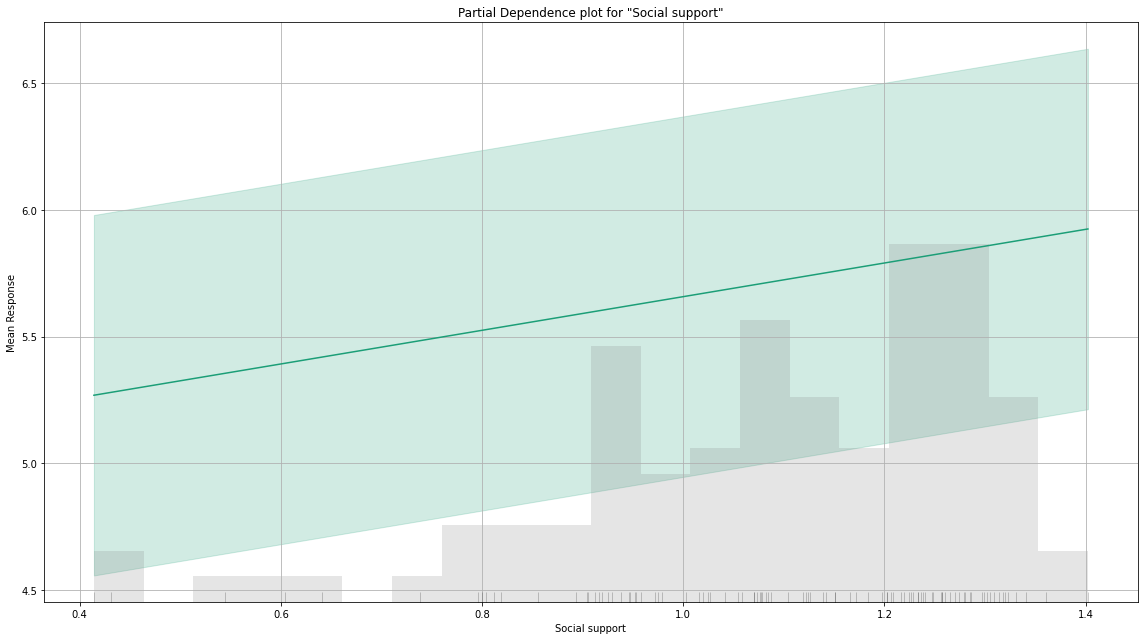

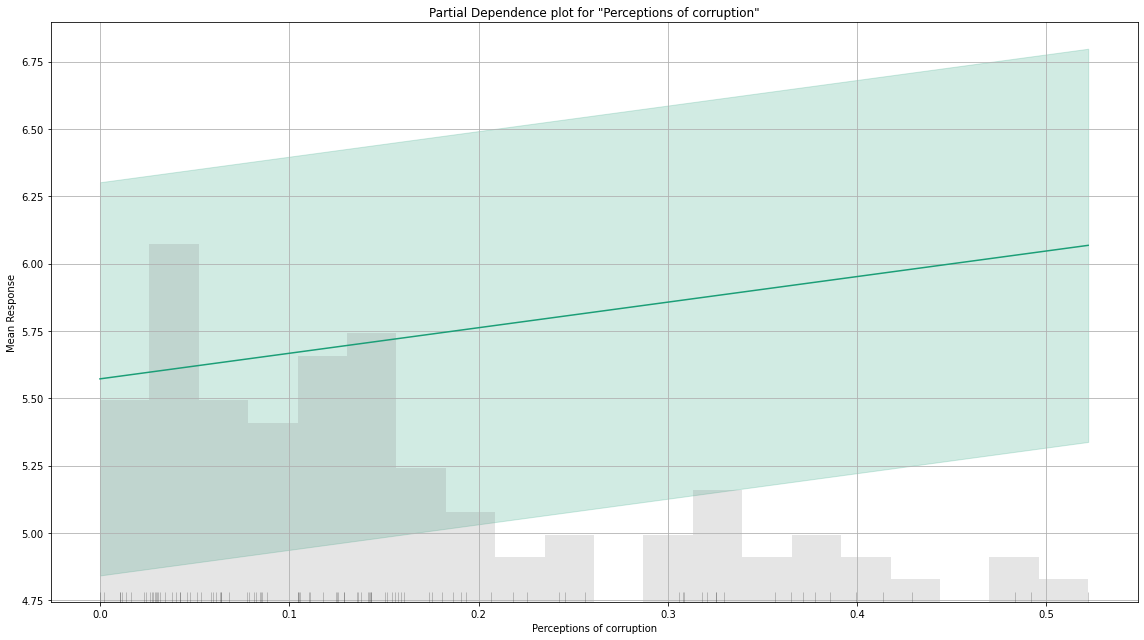

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

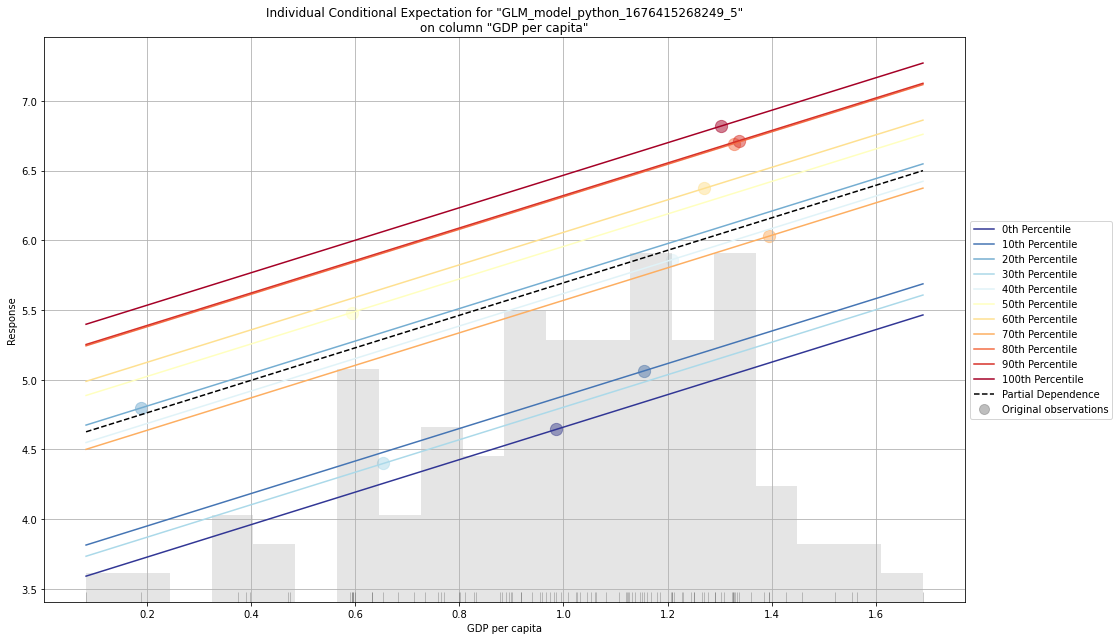

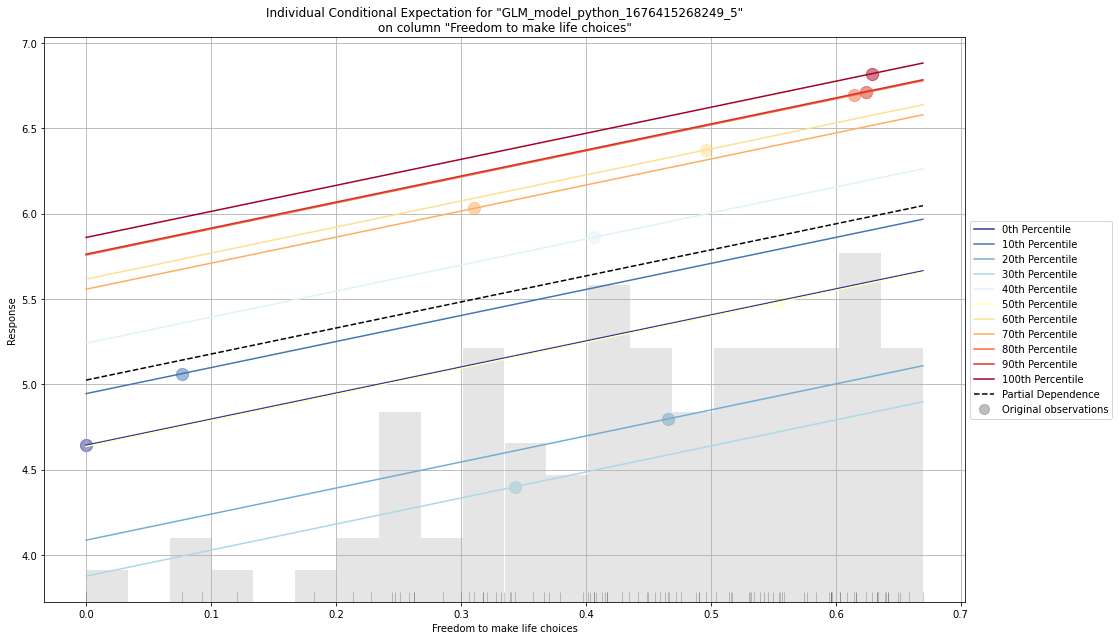

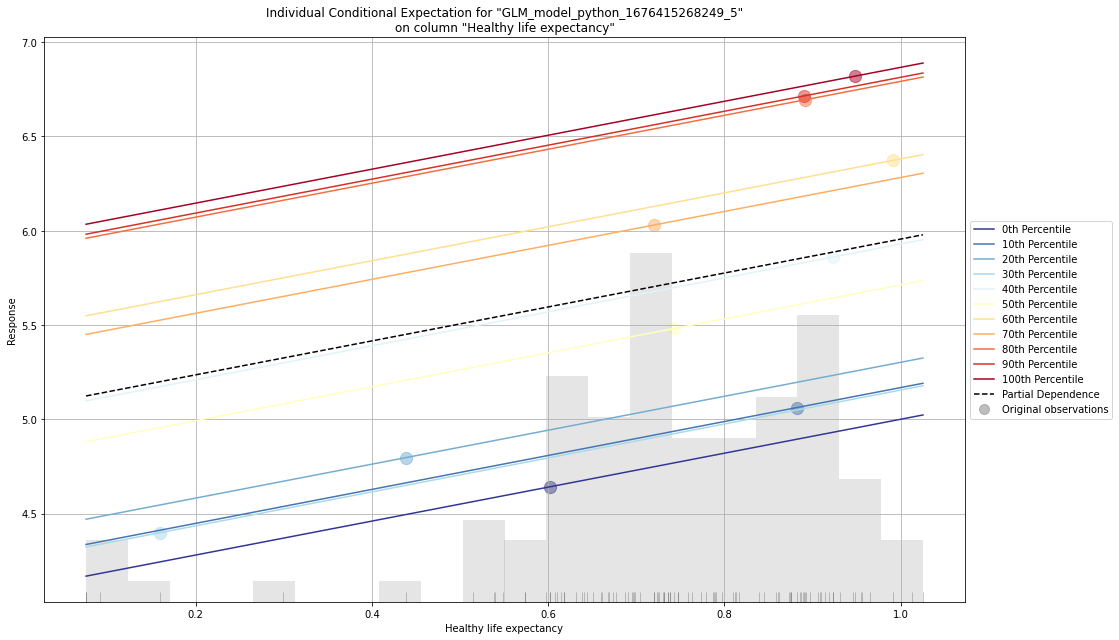

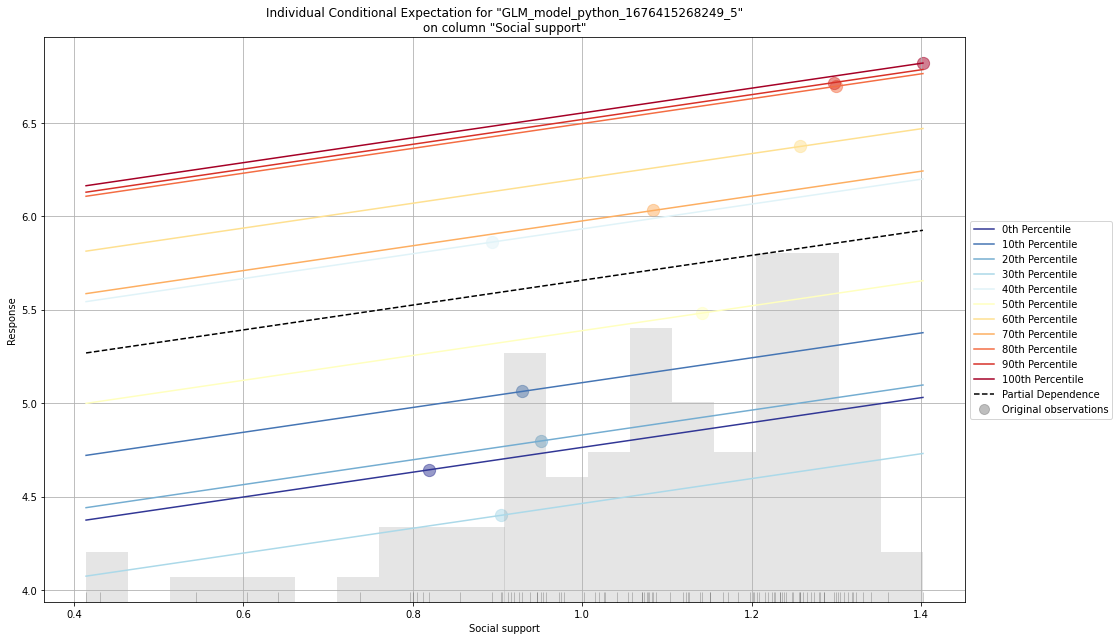

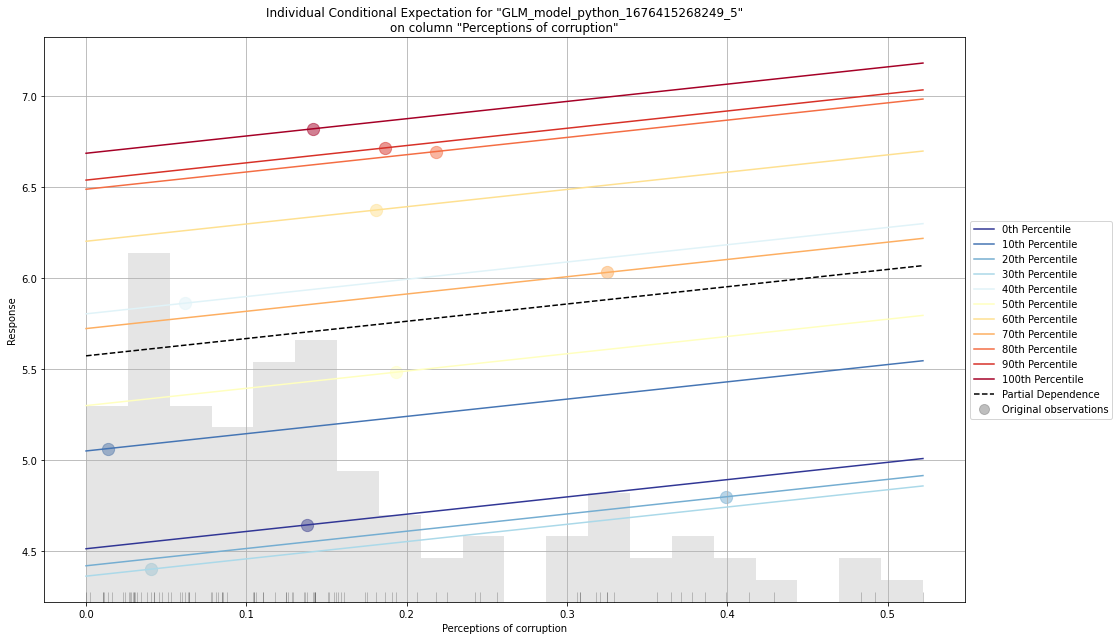

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
data_glm.explain(train[1:100,:])

## GBM Model <br>
Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. The guiding heuristic is that good predictive results can be obtained through increasingly refined approximations. H2O’s GBM sequentially builds regression trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.



In [ ]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,830.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-02-14 23:42:48,0.010 sec,0.0,1.1218489,0.9350724,1.2585449,1.1759166,0.9769112,1.3827799
,2023-02-14 23:42:48,0.024 sec,1.0,1.0704364,0.8853668,1.1458341,1.1321218,0.9392009,1.2816997
,2023-02-14 23:42:48,0.037 sec,2.0,1.0248601,0.8452501,1.0503383,1.0870518,0.9003910,1.1816817
,2023-02-14 23:42:48,0.043 sec,3.0,0.9845055,0.8072618,0.9692511,1.0525270,0.8678363,1.1078132
,2023-02-14 23:42:48,0.048 sec,4.0,0.9483394,0.7766941,0.8993476,1.0142014,0.8355310,1.0286045
,2023-02-14 23:42:48,0.065 sec,5.0,0.9147924,0.7461540,0.8368451,0.9798311,0.8047474,0.9600690
,2023-02-14 23:42:48,0.070 sec,6.0,0.8850636,0.7195844,0.7833377,0.9529727,0.7867622,0.9081569
,2023-02-14 23:42:48,0.075 sec,7.0,0.8580753,0.6957214,0.7362932,0.9236566,0.7607556,0.8531414


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

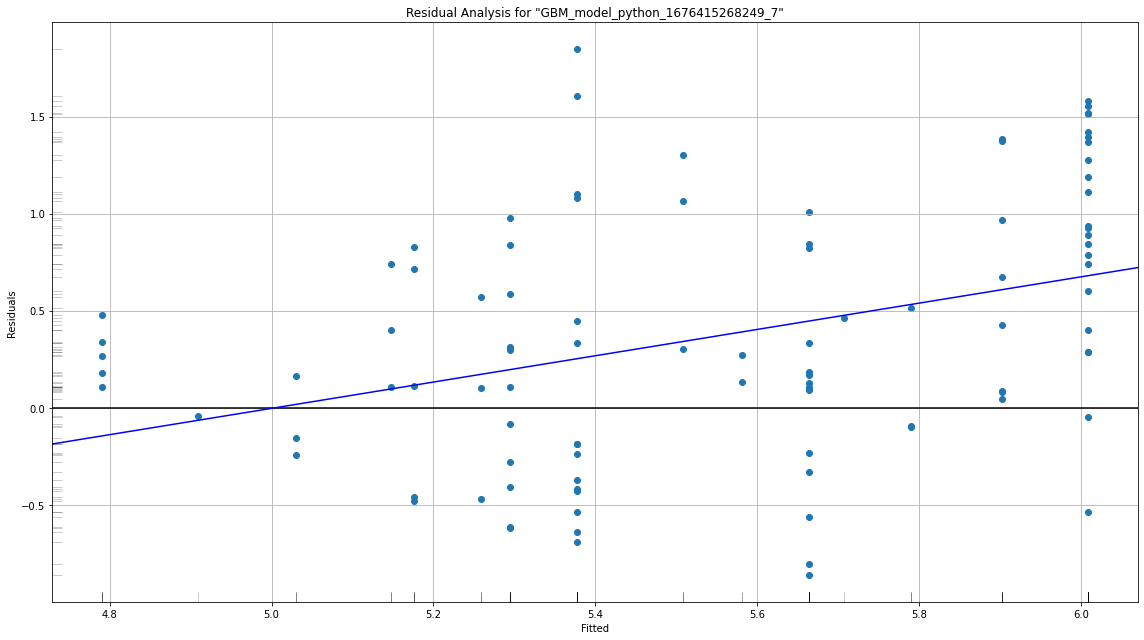

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

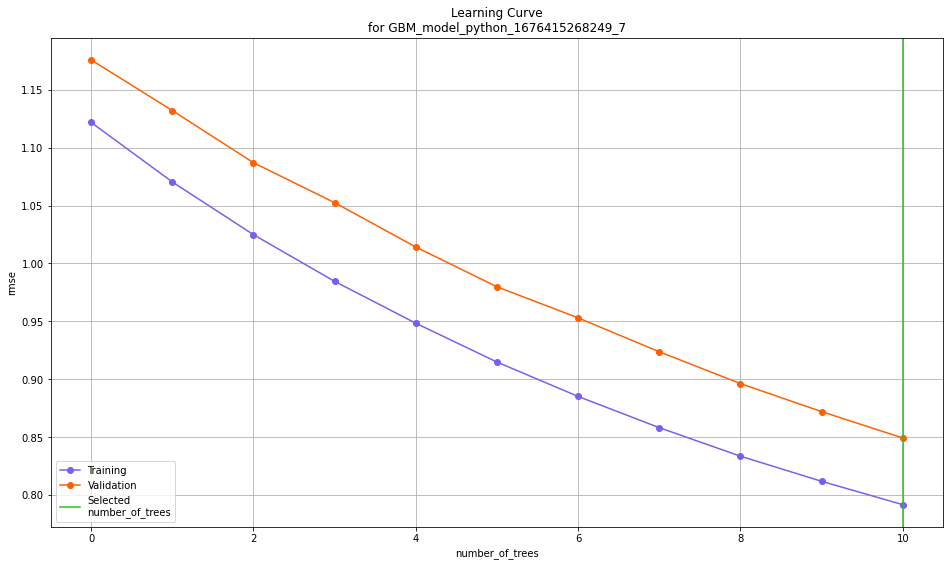

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

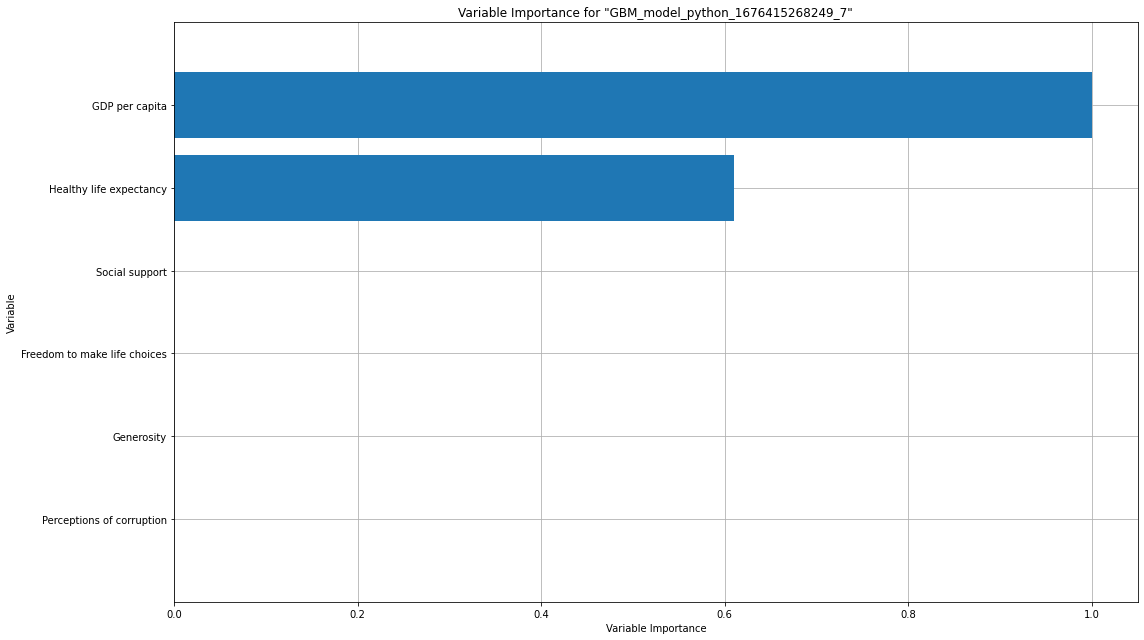

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

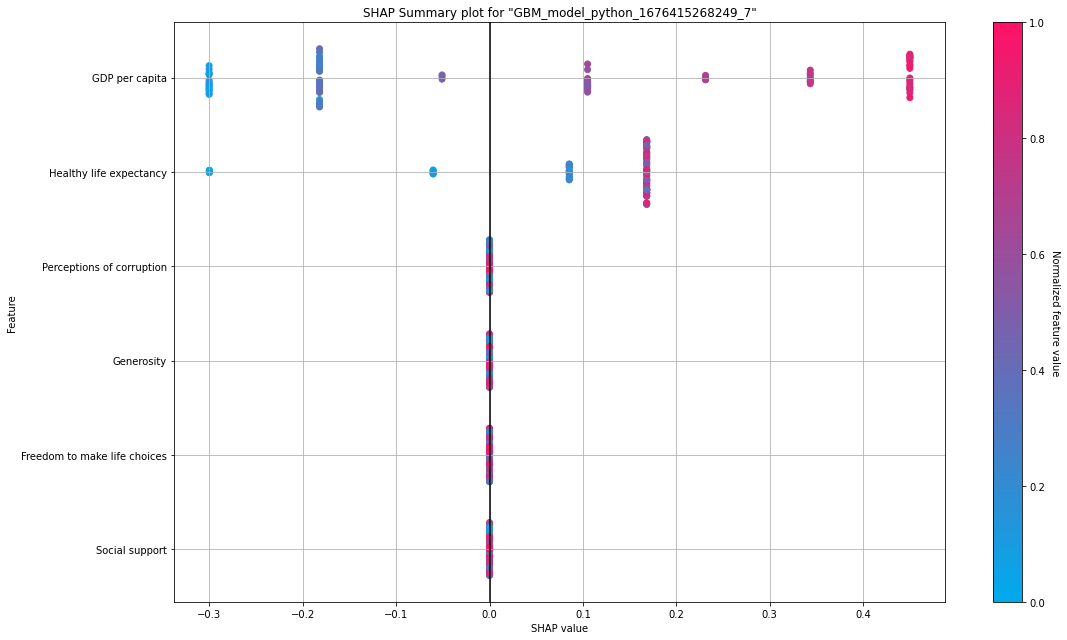

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

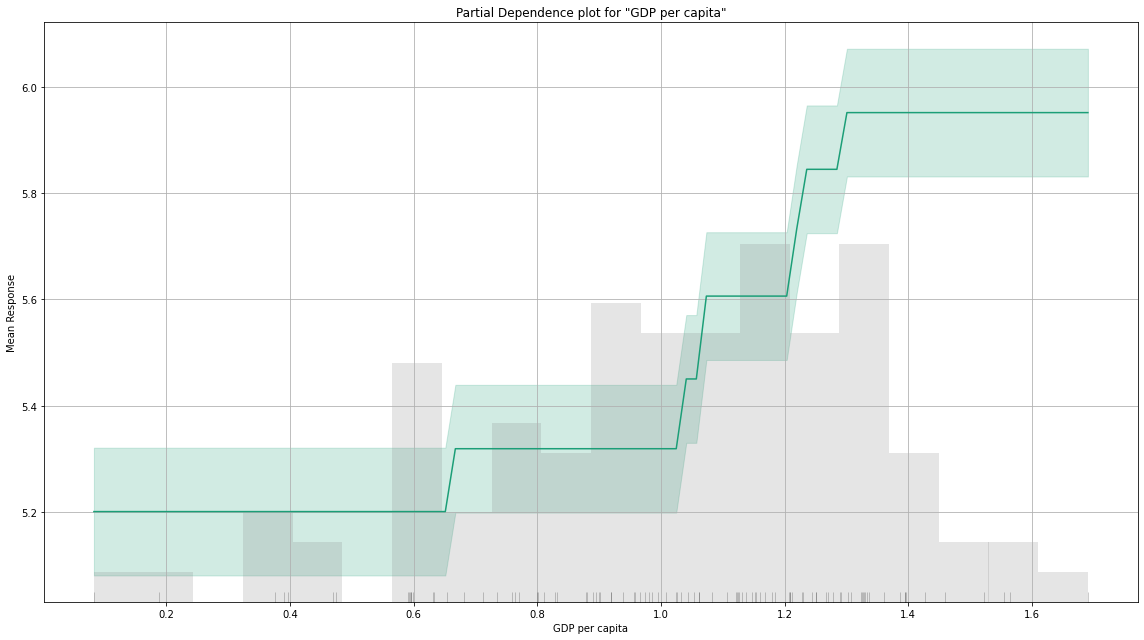

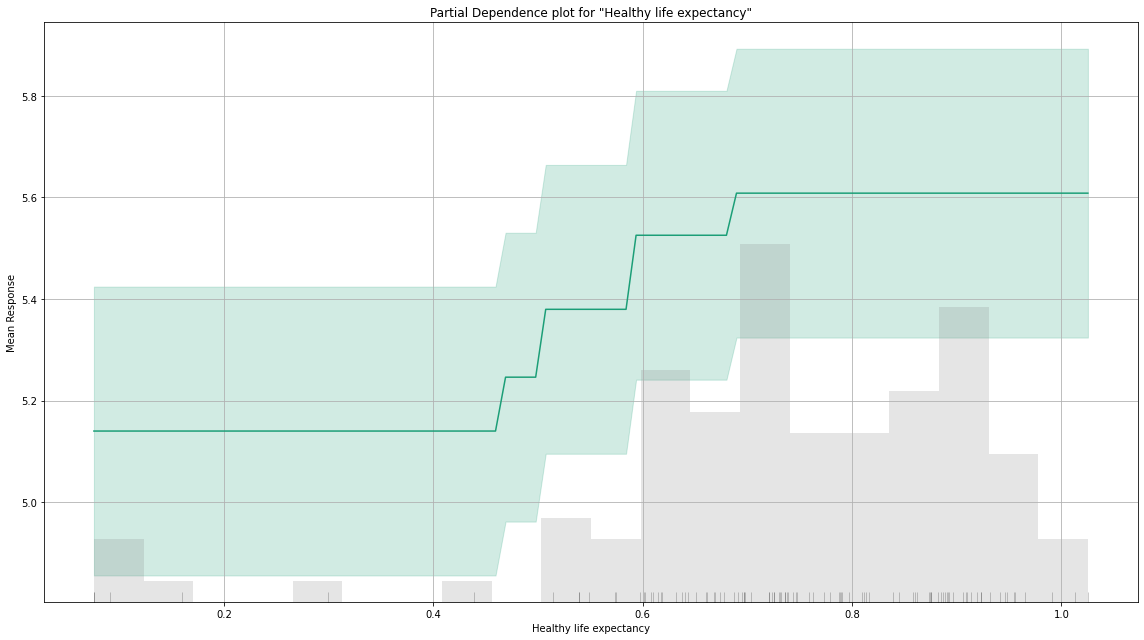

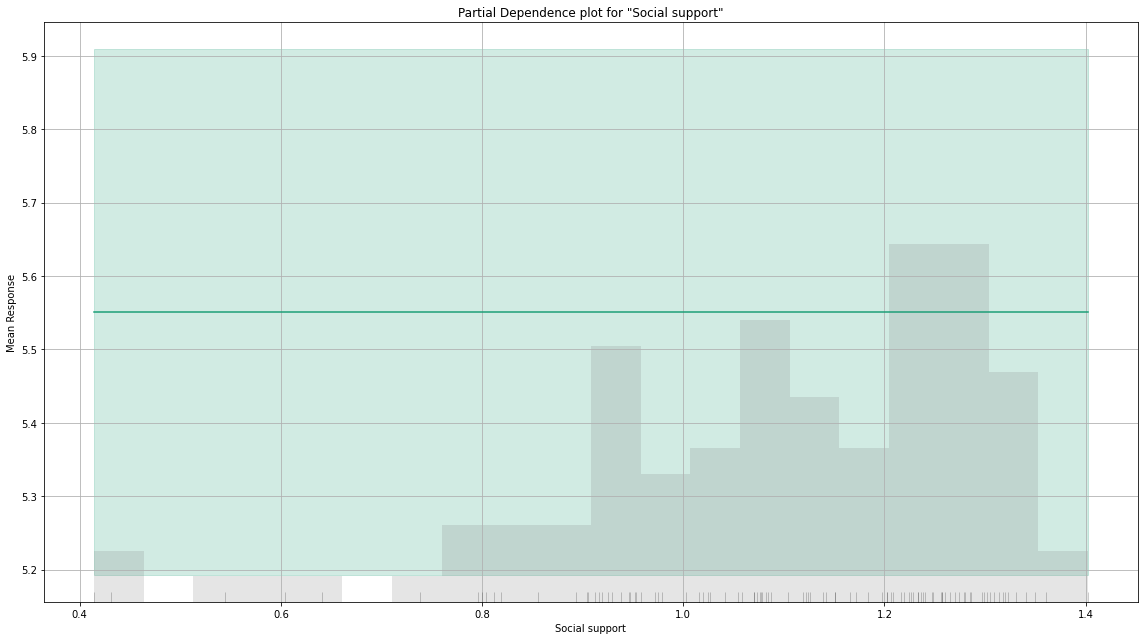

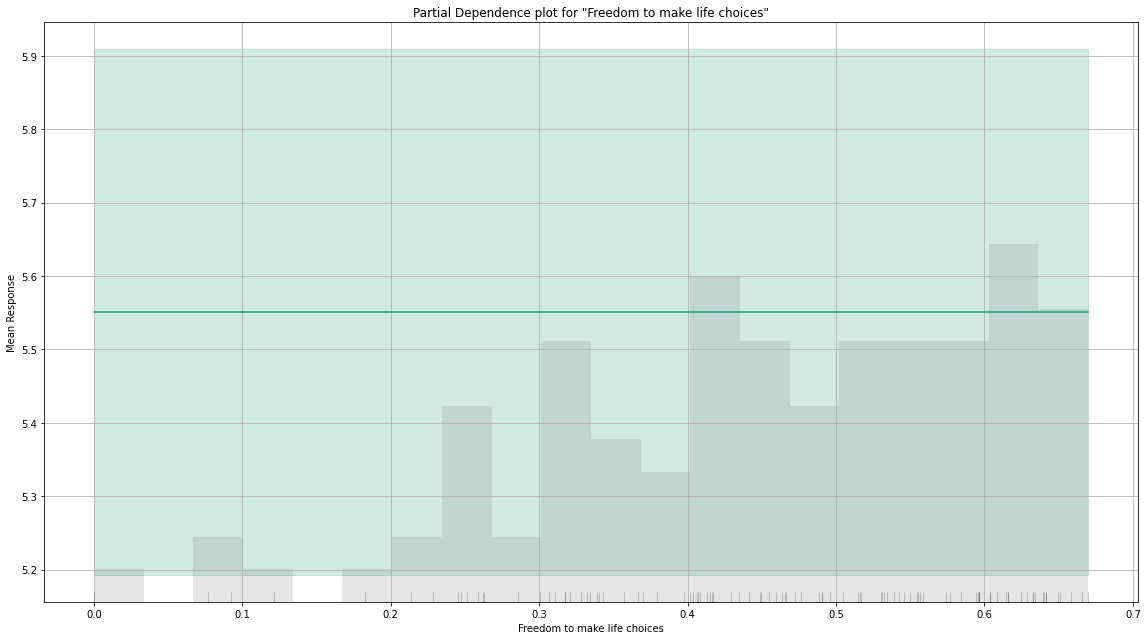

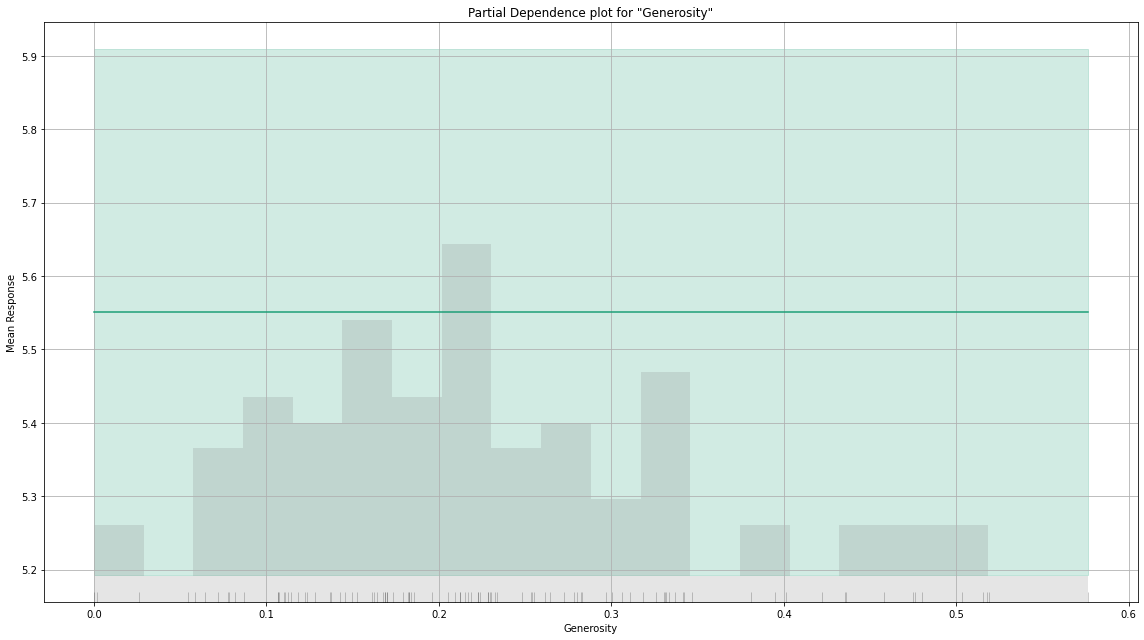

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

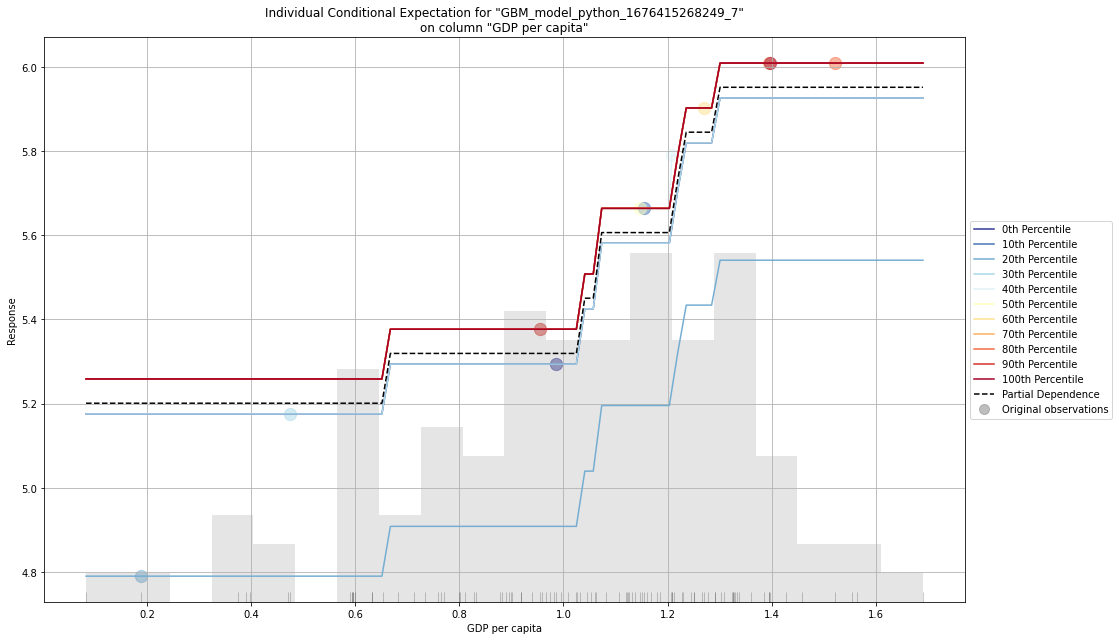

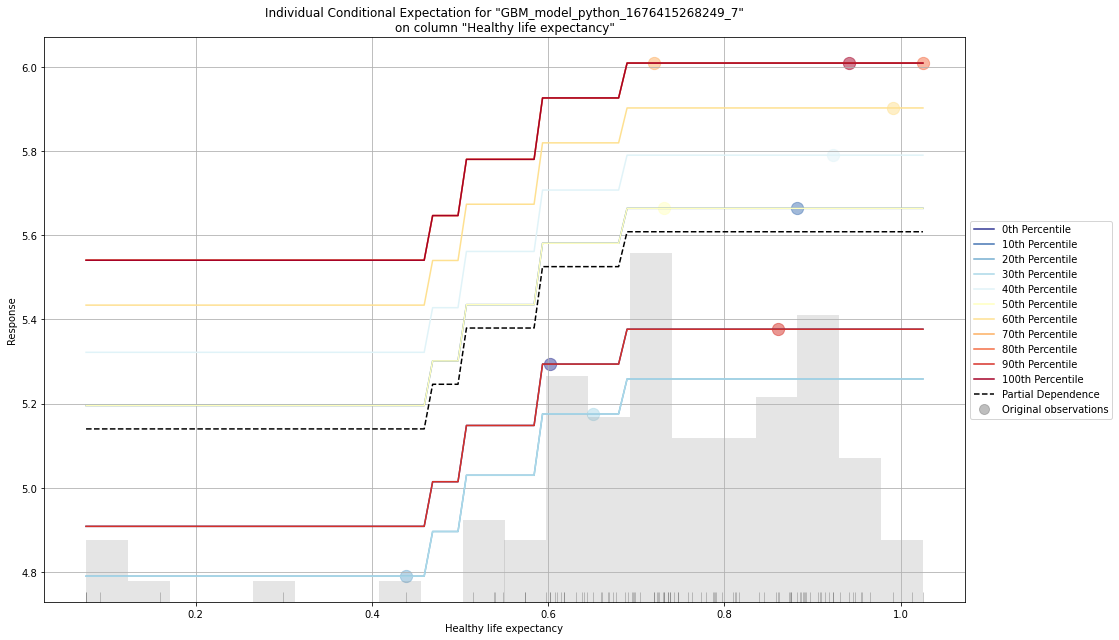

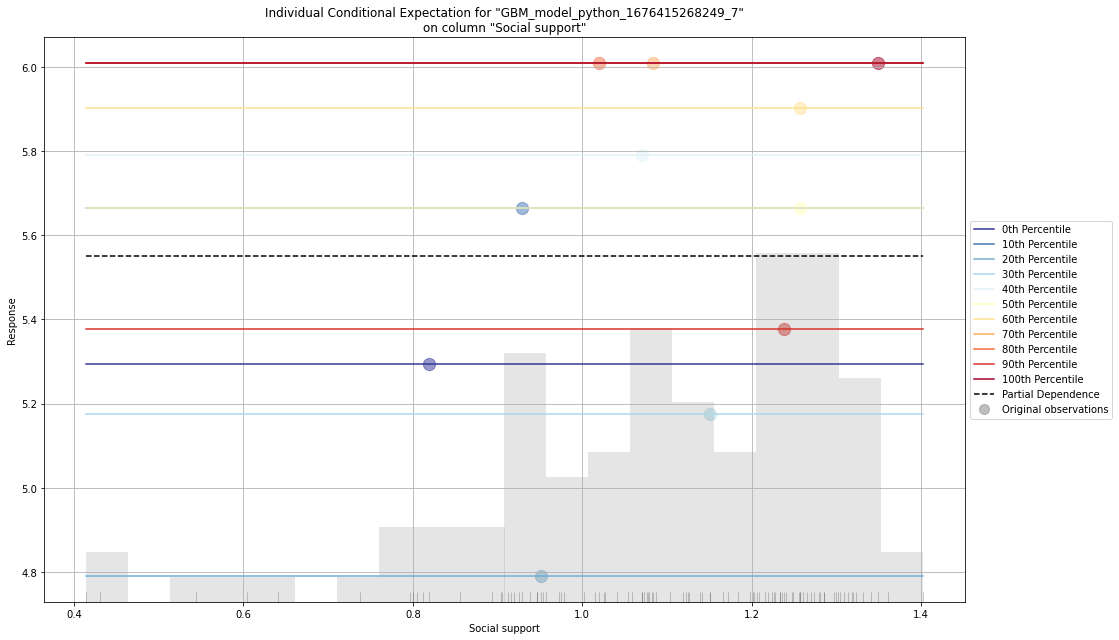

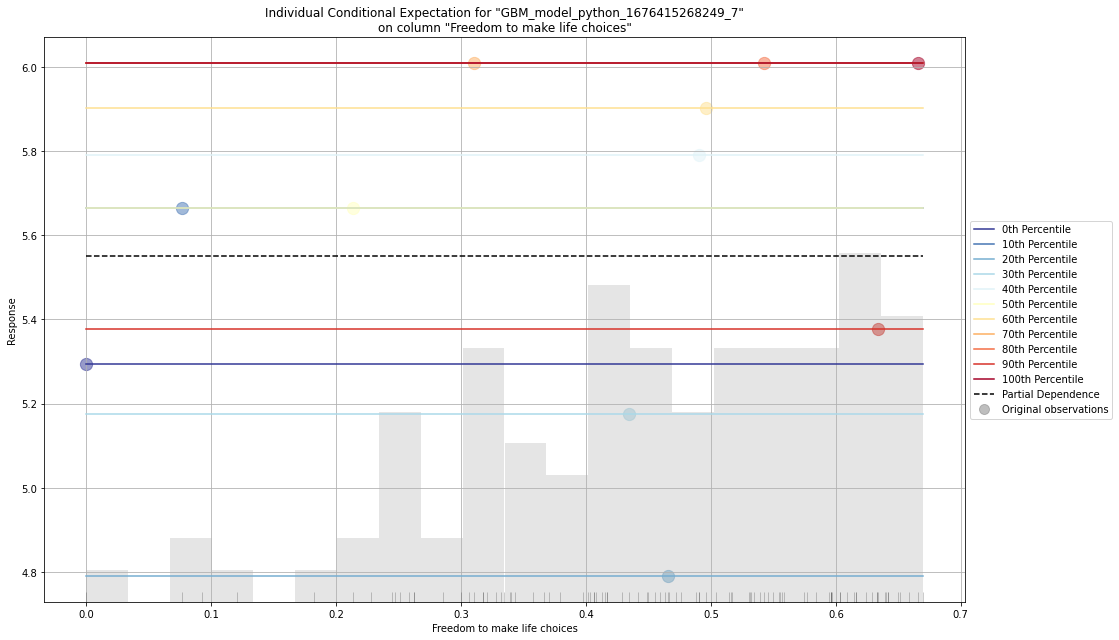

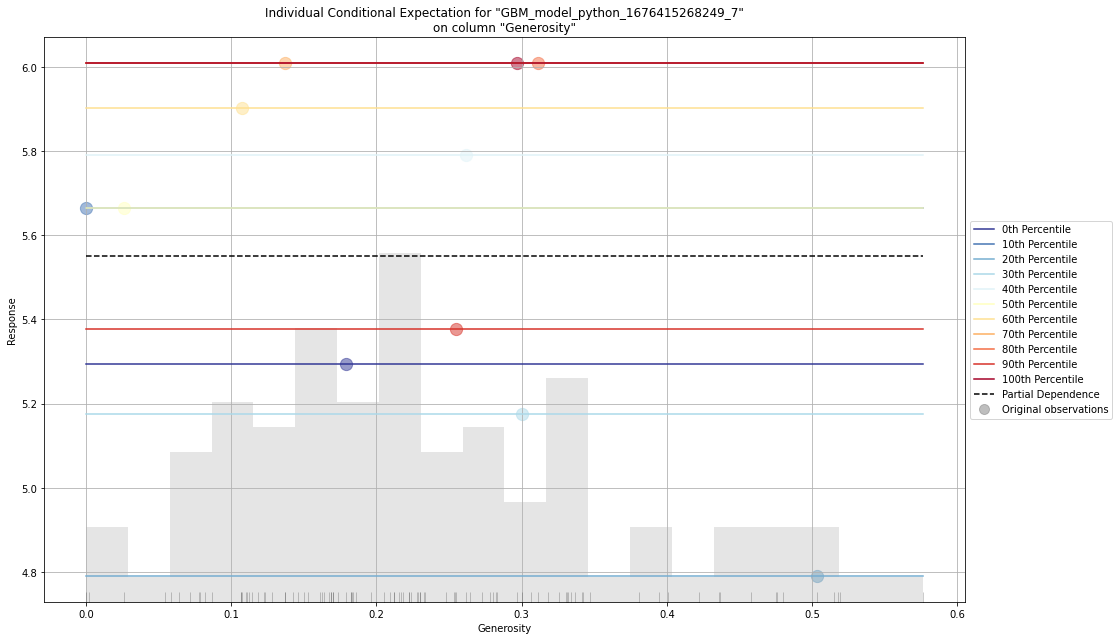

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
data_gbm.explain(train[0:100,:])

## Variable Importance in both models 
<b>H2O GLM, the "intercept" refers to the model's bias term. The intercept is a constant term that is added to the linear combination of input features to shift the output of the model.</b>

In [ ]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor                    |   Normalized Coefficient |
|------------------------------+--------------------------|
| Intercept                    |                5.39056   |
| GDP per capita               |                0.476402  |
| Freedom to make life choices |                0.2334    |
| Healthy life expectancy      |                0.224688  |
| Social support               |                0.216199  |
| Perceptions of corruption    |                0.0986992 |
| Generosity                   |                0.0705313 |


In [ ]:
data_glm.varimp()

[('GDP per capita', 0.4764021039009094, 1.0, 0.36093262169867496),
 ('Freedom to make life choices',
  0.23340022563934326,
  0.4899227432628845,
  0.17682910015567974),
 ('Healthy life expectancy',
  0.22468754649162292,
  0.471634244794094,
  0.170228184456407),
 ('Social support',
  0.21619944274425507,
  0.4538171451678225,
  0.16379741197723033),
 ('Perceptions of corruption',
  0.09869915246963501,
  0.20717614733742698,
  0.07477663001192848),
 ('Generosity',
  0.07053130120038986,
  0.14804993643575556,
  0.053436051700079444)]

In [ ]:
data_gbm.varimp()

[('GDP per capita', 1471.2515869140625, 1.0, 0.6212255404381852),
 ('Healthy life expectancy',
  897.053466796875,
  0.6097213248744472,
  0.37877445956181477),
 ('Social support', 0.0, 0.0, 0.0),
 ('Freedom to make life choices', 0.0, 0.0, 0.0),
 ('Generosity', 0.0, 0.0, 0.0),
 ('Perceptions of corruption', 0.0, 0.0, 0.0)]

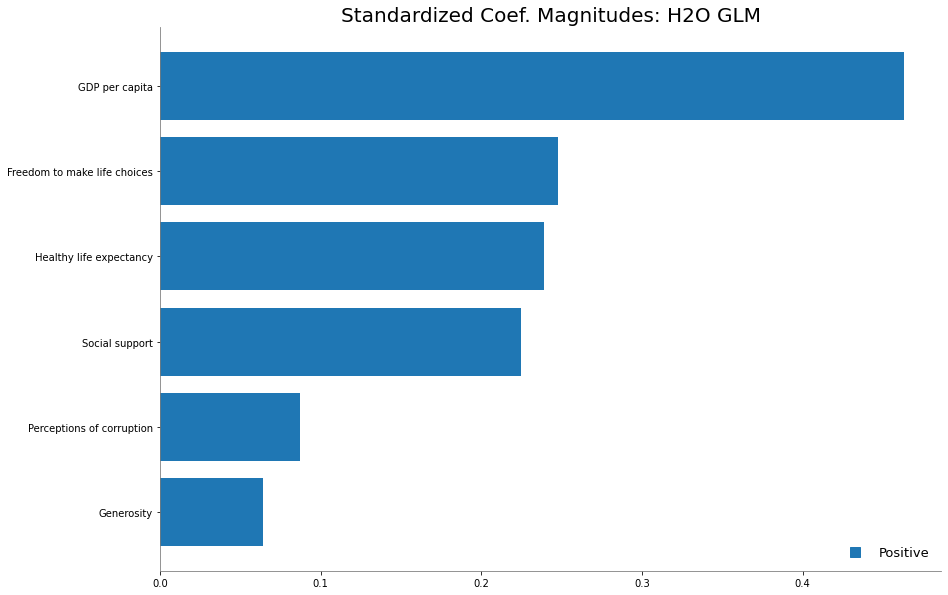

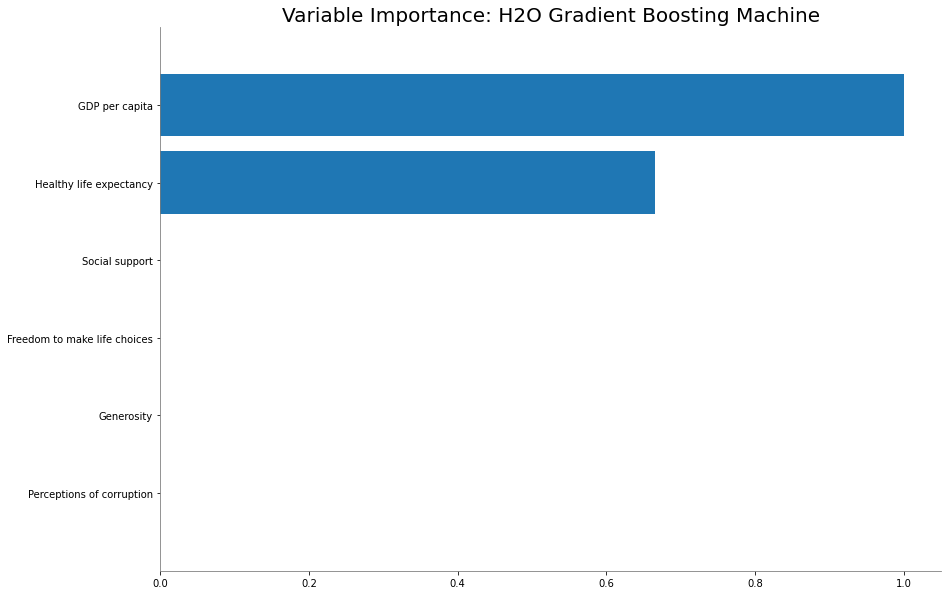

<Figure size 432x288 with 0 Axes>

In [ ]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

##Model Performances 

In [ ]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.5735717524262874
RMSE: 0.7573452003058364
MAE: 0.6124506804873828
RMSLE: 0.12060360814767974
Mean Residual Deviance: 0.5735717524262874

In [ ]:
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.39486354406803087
RMSE: 0.628381686610957
MAE: 0.4765615013610971
RMSLE: 0.10704913732114159
Mean Residual Deviance: 0.39486354406803087
R^2: 0.7109693567883526
Null degrees of freedom: 69
Residual degrees of freedom: 63
Null deviance: 96.79459626697228
Residual deviance: 27.640448084762163
AIC: 149.60634242118326

## **Before starting Auto ML** <br>
Before running an H2O AutoML process, it is often a good idea to run some basic modeling experiments to get a better understanding of the dataset and the modeling problem. Two commonly used algorithms for this purpose are the H2O Generalized Linear Model (GLM) and Gradient Boosting Machine (GBM).

The H2O GLM is a linear model that is well-suited for datasets with a relatively small number of features and a linear relationship between the features and the target variable. The GLM is also useful for quickly identifying which input features are most important in predicting the target variable.

The H2O GBM is a tree-based ensemble learning algorithm that can be used for both classification and regression problems. The GBM is well-suited for datasets with many features and complex relationships between the features and the target variable. The GBM can also be used to identify important features in the dataset.

By running GLM and GBM experiments on the dataset before running an H2O AutoML process, you can gain a better understanding of the data and the modeling problem. Specifically, you can:

1. Identify which features are most important for predicting the target variable<br>
2. Determine which algorithms are well-suited for the problem<br>
3. Get a sense of the performance of these algorithms on the dataset<br>
4. Use the results of the experiments to inform your selection of algorithms and features in the AutoML process.<br>
5. Overall, running some basic modeling experiments before using H2O AutoML can help you make more informed modeling decisions and improve the performance of your final model.<br>

## AutoML Best Algo

In [ ]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='Happiness rank']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [ ]:
#print(train)
#print(train.columns)

In [ ]:
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Happiness Score


In [66]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [67]:
model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),24/81
# GBM base models (used / total),7/33
# XGBoost base models (used / total),12/33
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),3/12
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [75]:
execution_time = time.time() - model_start_time
print(execution_time)

368.38590240478516


## Explaining output of next cell !! 
The reason why the H2O AutoML leaderboard shows a lot of stacked ensemble algorithms is because one of the primary goals of H2O AutoML is to automatically build a high-performing ensemble model from a diverse set of base models.

The process of building a stacked ensemble model involves training multiple base models on the input data, and then training a metalearning model on the predictions of the base models. The metalearning model learns how to combine the predictions of the base models in order to make more accurate predictions. The result is an ensemble model that is typically more accurate than any of the individual base models.

H2O AutoML uses a variety of base models during the training process, including deep learning models, tree-based models, and linear models. After training the base models, H2O AutoML selects the best performing models and uses them to build the stacked ensemble. The stacked ensemble is typically one of the top performing models on the leaderboard.

In general, stacked ensembles tend to perform well in many different types of predictive modeling problems, which is why H2O AutoML emphasizes their use. However, it's worth noting that the best model for a particular problem may not always be a stacked ensemble, and it's always a good idea to experiment with different models and ensembling techniques to find the best solution for a given problem.

In [ ]:
print(aml.leaderboard)

model_id                                                             rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_3_AutoML_2_20230214_11653           0.466936  0.21803   0.363297  0.0775368                  0.21803
StackedEnsemble_AllModels_6_AutoML_2_20230214_11653              0.467163  0.218242  0.362554  0.0773757                  0.218242
StackedEnsemble_BestOfFamily_6_AutoML_2_20230214_11653           0.46724   0.218314  0.361609  0.0774906                  0.218314
StackedEnsemble_BestOfFamily_4_AutoML_2_20230214_11653           0.468191  0.219203  0.364385  0.0776889                  0.219203
StackedEnsemble_AllModels_2_AutoML_2_20230214_11653              0.468527  0.219518  0.364455  0.0778079                  0.219518
XRT_1_AutoML_2_20230214_11653                                    0.468584  0.219571  0.367078  0.0779249                  0.219571
StackedEnsemble_AllModels_1_AutoML_2_20230214_11653              0.472055  0.222836 

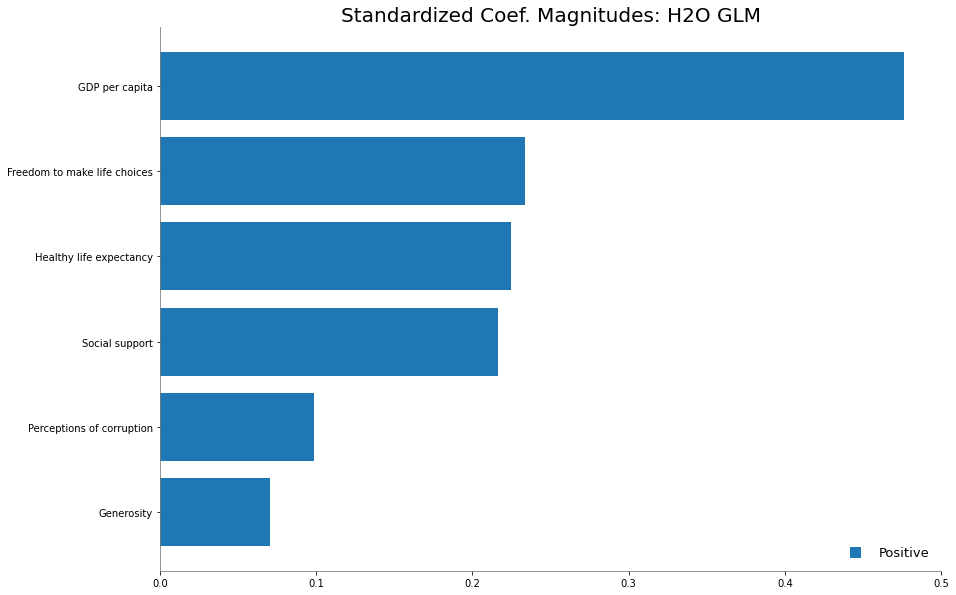

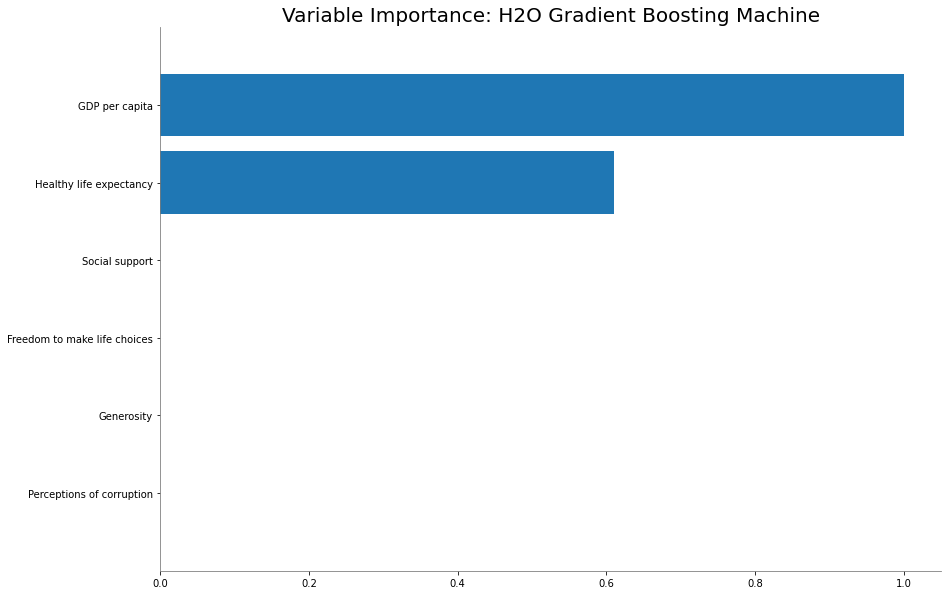

<Figure size 432x288 with 0 Axes>

In [76]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [77]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [78]:
best_model.algo

'stackedensemble'

In [83]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_AllModels_6_AutoML_1_20230214_235137', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_AllModels_6_AutoML_1_20230214_235137'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20230214_235137_training_py_17_sid_86a6', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20230214_235137_training_py_17_sid_86a6'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20230214_235137_training_py_17_sid_86a6', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20230214_235137_training_py_17_sid_86a6'}}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'c

<b>Lets Check Best Variables for XRT <br></b>
As mentioned we can check what is other best models variable for our data 


<b> XRT </b>

In H2O, the XRT (eXtremely Randomized Trees) model is a variant of the random forest algorithm that is designed to reduce overfitting and improve model performance.

The XRT model builds an ensemble of decision trees by randomly selecting subsets of features and splitting the data on each tree using a randomly selected subset of the features. Unlike traditional random forests, which use a split rule based on the best split, the XRT model splits the data using a randomly selected threshold within the range of the feature values. This randomness helps to reduce overfitting by introducing more variance in the model.

The XRT model is well-suited for datasets with many features and complex relationships between the features and the target variable. It is also effective for datasets with noisy or irrelevant features, as the random selection of features helps to reduce their impact on the final model.


In [85]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,GDP per capita,7864.234863,1.000000,0.366477
1,Healthy life expectancy,5109.478027,0.649711,0.238104
2,Social support,3256.958252,0.414148,0.151776
3,Freedom to make life choices,2440.254639,0.310298,0.113717
4,Perceptions of corruption,1811.502563,0.230347,0.084417
5,Generosity,976.590942,0.124181,0.045510


In [ ]:
h2o.cluster().shutdown()

H2O session _sid_9349 closed.


## LICENSE
MIT License

Copyright (c) 2023 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.